In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
hdb_string = "HDBdata with district_coord_dist_full.csv"
df = pd.read_csv(hdb_string, na_values=0)

# EDA

In [3]:
df.head()

,District,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist
0,20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640,11816.314673
1,20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238,9815.395378
2,20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425,10411.841335
3,20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175,11548.766494
4,20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076,10398.678760


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
District,113959.0,18.818084,6.328647,1.000000,18.000000,19.000000,23.000000,2.800000e+01
floor_area_sqm,113959.0,97.859061,24.147210,31.000000,82.000000,95.000000,113.000000,2.490000e+02
lease_commence_date,113959.0,1995.010477,13.395018,1966.000000,1985.000000,1995.000000,2005.000000,2.019000e+03
remaining_lease,113959.0,74.892075,13.288946,44.000000,64.000000,75.000000,85.000000,9.800000e+01
resale_price,113959.0,457961.507288,158521.858641,140000.000000,342000.000000,428000.000000,540000.000000,1.295000e+06
Price/sqm,113959.0,4713.508969,1275.304605,2089.552239,3870.967742,4408.602151,5169.651423,1.290323e+04
Latitude,113959.0,1.367317,0.042705,1.270369,1.336750,1.367785,1.395605,1.459192e+00
Longitude,113959.0,103.842270,0.071347,103.685206,103.780243,103.848998,103.899620,1.039876e+02
mrtdist,113959.0,12619.837991,5413.134785,58.626066,7841.104159,13618.287075,16664.566584,2.599007e+04


In [5]:
df[df.mrtdist.isna()]

,District,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist


In [6]:
df_dropped = df.dropna(axis=0)

In [7]:
df_dropped.describe().T

,count,mean,std,min,25%,50%,75%,max
District,113959.0,18.818084,6.328647,1.000000,18.000000,19.000000,23.000000,2.800000e+01
floor_area_sqm,113959.0,97.859061,24.147210,31.000000,82.000000,95.000000,113.000000,2.490000e+02
lease_commence_date,113959.0,1995.010477,13.395018,1966.000000,1985.000000,1995.000000,2005.000000,2.019000e+03
remaining_lease,113959.0,74.892075,13.288946,44.000000,64.000000,75.000000,85.000000,9.800000e+01
resale_price,113959.0,457961.507288,158521.858641,140000.000000,342000.000000,428000.000000,540000.000000,1.295000e+06
Price/sqm,113959.0,4713.508969,1275.304605,2089.552239,3870.967742,4408.602151,5169.651423,1.290323e+04
Latitude,113959.0,1.367317,0.042705,1.270369,1.336750,1.367785,1.395605,1.459192e+00
Longitude,113959.0,103.842270,0.071347,103.685206,103.780243,103.848998,103.899620,1.039876e+02
mrtdist,113959.0,12619.837991,5413.134785,58.626066,7841.104159,13618.287075,16664.566584,2.599007e+04


In [8]:
df_dropped.head()

,District,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist
0,20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640,11816.314673
1,20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238,9815.395378
2,20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425,10411.841335
3,20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175,11548.766494
4,20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076,10398.678760


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not Price/sqm

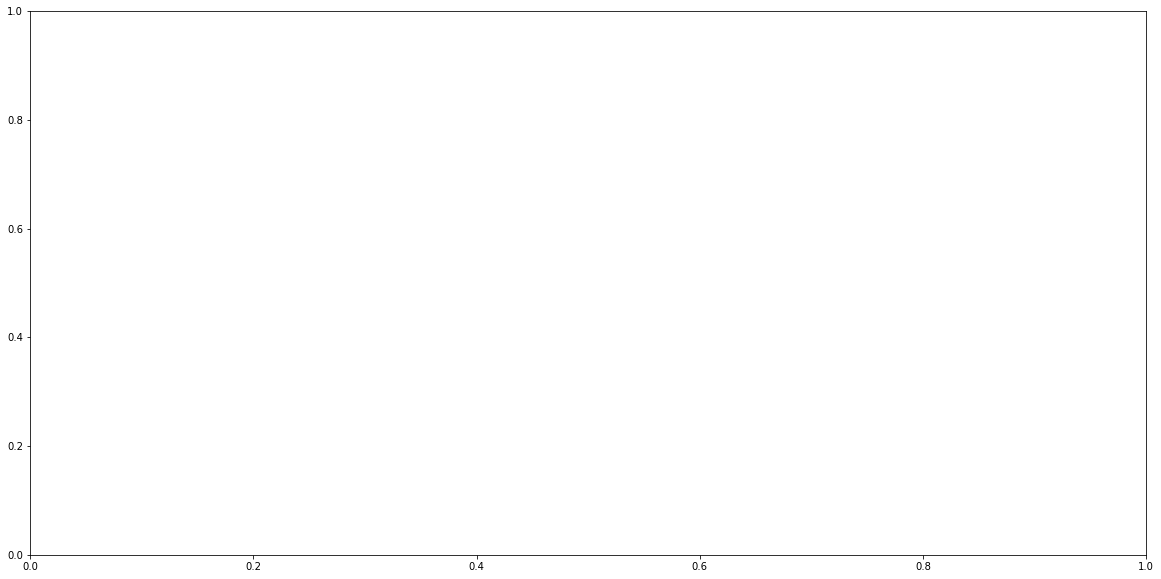

In [174]:
df_dropped.plot(kind='scatter', 
                x = 'Latitude', 
                y= 'Longitude', 
                c='Price/sqm', 
                label= 'Price', 
                cmap = 'cool',
                colorbar = True,
                figsize = (20,10))
plt.show()

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


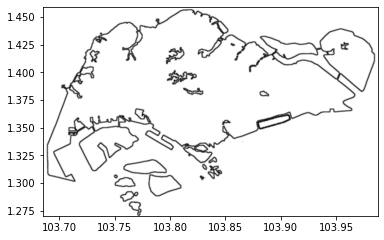

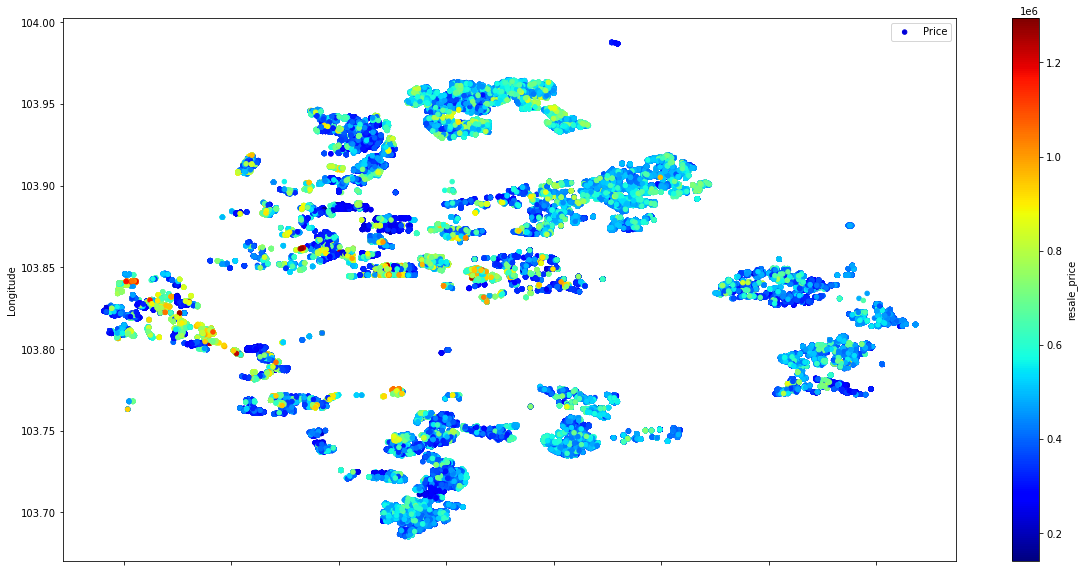

In [173]:
fig , ax = plt.subplots()
#plt.figure(figsize=(10,7))
img= plt.imread('SingaporeMap.png')


plt.imshow(img,zorder=0,extent=[df_dropped.Longitude.min(),df_dropped.Longitude.max(),df_dropped.Latitude.min(),df_dropped.Latitude.max()], cmap= 'gray')
ax = plt.gca()
df_dropped.plot(kind='scatter', 
                x = 'Latitude', 
                y= 'Longitude', 
                c='resale_price', 
                #s = df_dropped
                label= 'Price', 
                cmap = 'jet',
                colorbar = True,
                figsize = (20,10))
plt.legend()
plt.show()

In [9]:
df_dropped.drop(columns=['town','lease_commence_date','Price/sqm'], inplace = True)
df_dropped.District = df_dropped.District.astype(str)
df_dropped.drop(columns=['street_name','block'], inplace = True)

In [10]:
df_dropped.head()

,District,month,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,Latitude,Longitude,mrtdist
0,20,1 01 2017,2 ROOM,10 TO 12,44.0,Improved,61,232000.0,1.375748,103.854640,11816.314673
1,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,60,250000.0,1.369525,103.837238,9815.395378
2,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,262000.0,1.380760,103.835425,10411.841335
3,20,1 01 2017,3 ROOM,04 TO 06,68.0,New Generation,62,265000.0,1.366213,103.857175,11548.766494
4,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,265000.0,1.380987,103.835076,10398.678760


In [11]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113959 entries, 0 to 113958
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   District         113959 non-null  object 
 1   month            113959 non-null  object 
 2   flat_type        113959 non-null  object 
 3   storey_range     113959 non-null  object 
 4   floor_area_sqm   113959 non-null  float64
 5   flat_model       113959 non-null  object 
 6   remaining_lease  113959 non-null  int64  
 7   resale_price     113959 non-null  float64
 8   Latitude         113959 non-null  float64
 9   Longitude        113959 non-null  float64
 10  mrtdist          113959 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 10.4+ MB


# Feature Engineering

In [12]:
## PCA here, DBSCAN

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

polynominal features (degree 2) added in for numerical features below in pipeline

# Modelling

In [13]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder , PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

seed_number = 42

In [14]:
y = df_dropped.resale_price
x = df_dropped.loc[:, df_dropped.columns != 'resale_price']

In [15]:
num_cols = x.select_dtypes(['float64','int64']).columns
cat_cols = x.select_dtypes(['object']).columns

In [16]:
df_dropped.shape

(113959, 11)

In [17]:
# Creating training, validation and test sets

X_train, X_temp, y_train, y_temp = train_test_split(x, y ,
                                                    test_size = 0.2, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [18]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp ,
                                                    test_size = 0.5, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [19]:
print('Shapes')
print('X_train.shape \t' , X_train.shape)
print('X_val.shape \t' , X_val.shape)
print('X_test.shape \t' , X_test.shape)
print('y_train.shape \t' , y_train.shape)
print('y_val.shape \t' , y_val.shape)
print('y_test.shape \t' , y_test.shape)

Shapes
X_train.shape 	 (91167, 10)
X_val.shape 	 (11396, 10)
X_test.shape 	 (11396, 10)
y_train.shape 	 (91167,)
y_val.shape 	 (11396,)
y_test.shape 	 (11396,)


In [20]:
X_train.head()

,District,month,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,Latitude,Longitude,mrtdist
70882,23,1 06 2020,4 ROOM,10 TO 12,104.0,Model A,62,1.346244,103.749405,3338.185833
88389,13,1 01 2021,3 ROOM,10 TO 12,67.0,Model A,94,1.329476,103.889293,13955.930962
42714,22,1 01 2019,3 ROOM,04 TO 06,67.0,New Generation,63,1.348451,103.717384,6077.481309
66256,16,1 02 2020,3 ROOM,13 TO 15,67.0,New Generation,58,1.334728,103.928924,18394.625537
61448,18,1 11 2019,EXECUTIVE,13 TO 15,146.0,Apartment,73,1.376877,103.945004,21078.464975


In [21]:
# Pipeline needs to include the elimination of the column and feature transformation / engineering

In [22]:
# Pipeline

# Scale numerical variables

num_pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures())
])

# One hot encoding categorical variables

cat_pipline = Pipeline([
    ('ohe', OneHotEncoder(drop = 'first'))
])

preprocess = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipline, cat_cols)
])

In [23]:
X_train_preprocessed = preprocess.fit_transform(X_train)

In [24]:
X_val_preprocessed = preprocess.transform(X_val)

In [25]:
X_train_preprocessed.shape

(91167, 143)

In [26]:
X_train_preprocessed[:10]

<10x143 sparse matrix of type '<class 'numpy.float64'>'
	with 260 stored elements in Compressed Sparse Row format>

In [27]:
X_train_preprocessed[0].shape

(1, 143)

In [28]:
X_val_preprocessed.shape

(11396, 143)

In [29]:
def plot_results(mse_train, mse_cv, title):
    
    cv = len(mse_cv)    
    fig, ax = plt.subplots(figsize = (5,5))
    
    train_mse_list = []
    for i in range(cv):
        train_mse_list.append(mse_train)
    
    ax.plot(range(cv), train_mse_list, 'r-', label = 'Training RMSE')
    ax.plot(range(cv), mse_cv, 'b--', label = 'Validation RMSE')
    ax.set_title(title)
    ax.set_xlabel('K-Folds')
    ax.set_ylabel('Error')
    ax.legend()
    plt.show()

In [30]:
model_list = {'Linear Regression':LinearRegression(), 
              'Lasso':Lasso(),
              'Ridge': Ridge(), 
              'Light Gradient Boosting Machine' : lgb.LGBMRegressor(random_state=seed_number),
              'Decision Tree' :DecisionTreeRegressor()
              #'Random Forest' :RandomForestRegressor()
             }

In [31]:
# Check for overfitting, shortlisting models

Model is  Linear Regression
RMSE  49810.200254529394
MAE  37906.006422190956
Val RMSE  [52083.30557033009, 52146.53349526144, 51671.04395674182, 52385.2931983819, 49468.92071564983, 49782.675100117536, 50032.807760023315]
Mean Val RMSE  51081.51139950085
R2 Score  0.9047519253161234


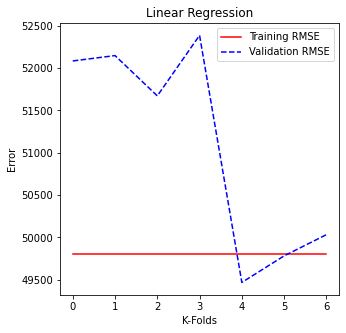

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:515: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60653559128272.3, tolerance: 227761282658.64008
  max_iter, tol, rng, random, positive)


Model is  Lasso
RMSE  49809.80195752661
MAE  37905.536420302065
Val RMSE  [52107.20317377479, 52129.96470860463, 51606.544403379085, 52367.67340380643, 49463.2047111623, 49776.66794420368, 50009.268869035805]
Mean Val RMSE  51065.78960199525
R2 Score  0.9047534485732392


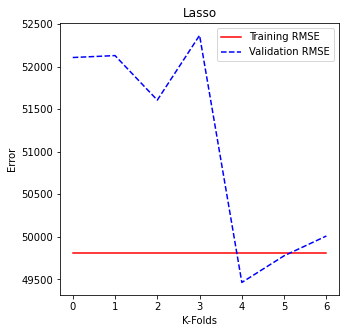

Model is  Ridge
RMSE  49893.746220772686
MAE  37984.94084608994
Val RMSE  [52606.269738833726, 51960.75688657594, 51470.21001213606, 52442.7485219503, 49355.35395303374, 50117.08261918657, 49894.02515784334]
Mean Val RMSE  51120.9209842228
R2 Score  0.904432140775128


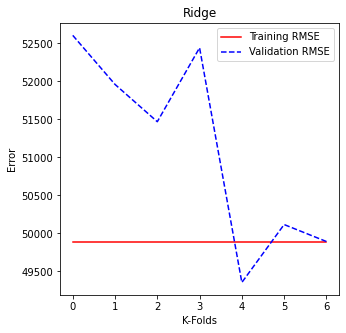

Model is  Light Gradient Boosting Machine
RMSE  34644.378884782
MAE  25359.940191078073
Val RMSE  [41300.13517926713, 43223.955972324315, 43755.01800123391, 44170.693610235205, 38941.62888285342, 44202.96129670231, 40603.01210958522]
Mean Val RMSE  42313.91500745736
R2 Score  0.9539228945123425


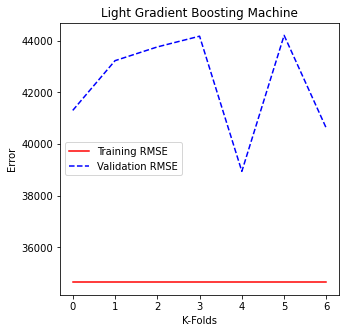

Model is  Decision Tree
RMSE  41344.16226107062
MAE  28566.32504007254
Val RMSE  [65366.78899067208, 70703.88088852561, 69125.37741400658, 63351.02318026845, 63380.016379127635, 65856.87322618841, 62087.67077014941]
Mean Val RMSE  65695.94726413403
R2 Score  0.9343782174932647


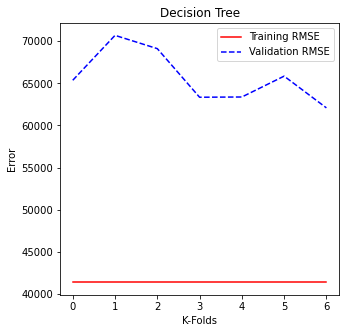

In [32]:
cv = 7
training_samples = 5000

train_rmse_list = []
val_rmse_list = []

for name , model in model_list.items():
    
    model_instance = model.fit(X_train_preprocessed, y_train)
    y_pred = model_instance.predict(X_val_preprocessed)

    mse_train = mean_squared_error(y_val, y_pred)**(1/2)
    mae_train = mean_absolute_error(y_val, y_pred)
    r2_train = r2_score(y_val, y_pred)
    
    model_cv_score = cross_val_score(model_instance,X_train_preprocessed[:training_samples], y_train[:training_samples], scoring = 'neg_mean_squared_error', cv=cv, n_jobs = -1)
    
    model_cv_rmse = (-model_cv_score)**(1/2)
    
    with open(name+'_pkl', 'wb') as files:
        pickle.dump(model, files)
    
    # with open(name+'_results_pkl', 'wb') as files:
    #     pickle.dump(model, files)
    
    train_rmse_list.append(mse_train)
    val_rmse_list.append(model_cv_rmse)
    
    print('Model is ', name)
    print('RMSE ', mse_train)
    print('MAE ', mae_train)
    print('Val RMSE ' , list(model_cv_rmse))
    print('Mean Val RMSE ' , model_cv_rmse.mean())
    print('R2 Score ' , r2_train)

    plot_results(mse_train,model_cv_rmse, name)

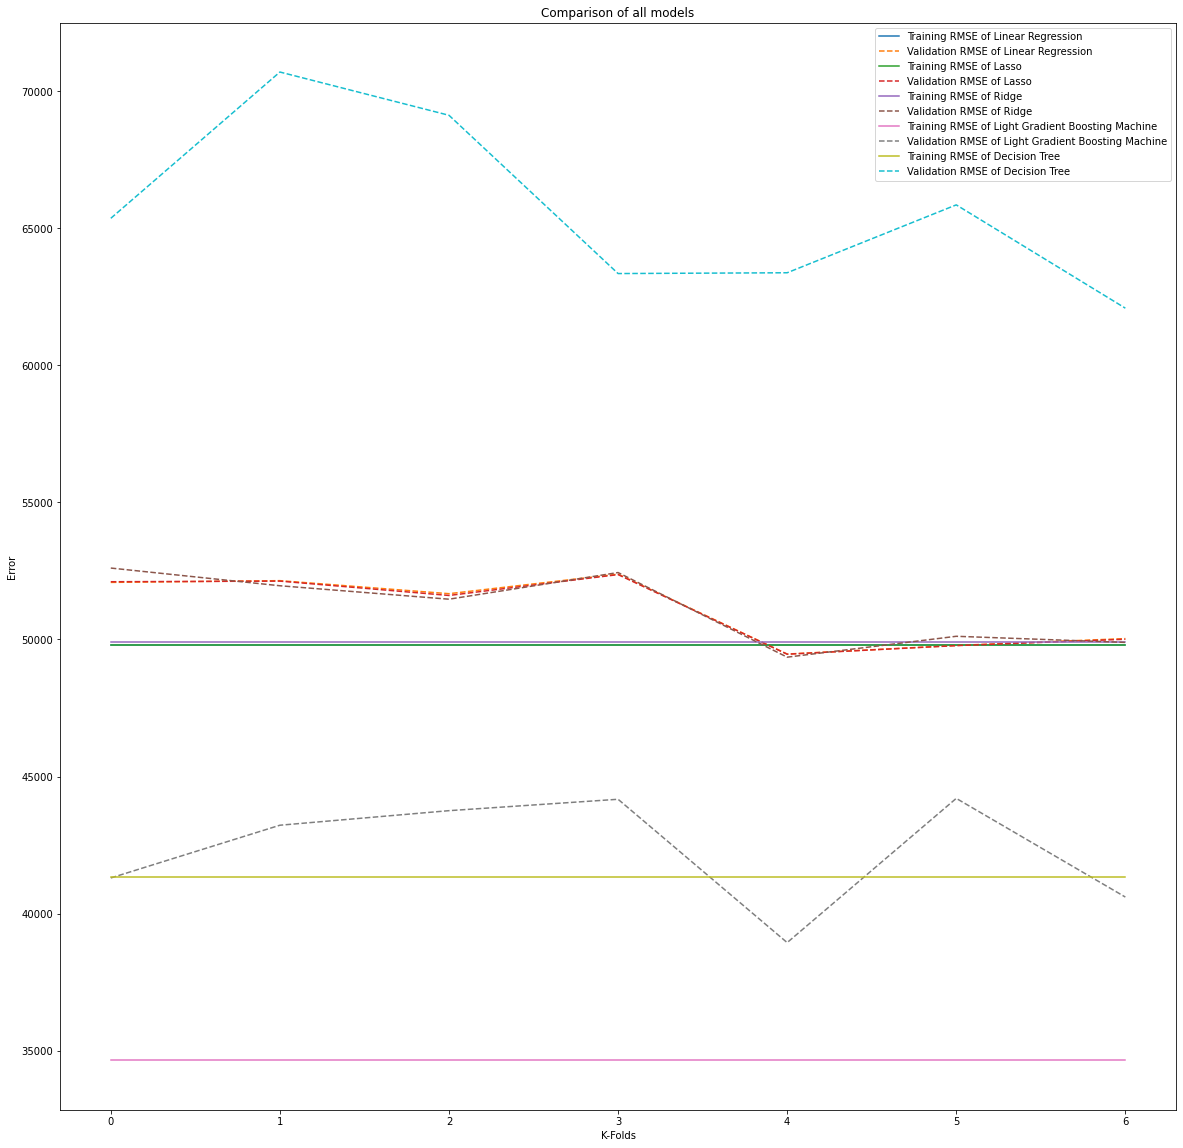

In [33]:
fig, ax = plt.subplots(figsize = (20,20))

for index, model_name in enumerate(model_list.keys()):
    train_mse_list = []

    # creates a line of the training error
    for i in range(len(val_rmse_list[index])):
        train_mse_list.append(train_rmse_list[index])
    
    ax.plot(range(len(val_rmse_list[index])), train_mse_list,label = 'Training RMSE of ' + model_name)
    ax.plot(range(len(val_rmse_list[index])), val_rmse_list[index], '--' , label = 'Validation RMSE of ' + model_name)

ax.set_title('Comparison of all models')
ax.set_xlabel('K-Folds')
ax.set_ylabel('Error')
ax.legend()
plt.show()

In [34]:
# Hyperparameter Tunning for selected models

In [35]:
params = {'max_bin': [300,350,400],
          'learning_rate': np.arange(0.1,0.7,0.2),
          'num_leaves': range(200,300,20),
         'random_state': [seed_number]}

cv = 7

lgb = lgb.LGBMRegressor()

cv = GridSearchCV(lgb,param_grid = params, scoring = 'neg_mean_squared_error', cv=7)

lgb_cv = cv.fit(X_train_preprocessed, y_train)

print(lgb_cv.best_params_)

{'learning_rate': 0.30000000000000004, 'max_bin': 350, 'num_leaves': 240, 'random_state': 42}


In [36]:
lgb_score = (-lgb_cv.best_score_)**(1/2)
print(lgb_score)

26569.95433510077


In [52]:
# Feature importance

In [37]:
len(lgb_cv.best_estimator_.feature_importances_)

143

In [144]:
print(lgb_cv.best_estimator_.feature_importances_)

[   0 1054  826 1222  931  784  593 1569 1302 1049 1142  563 1436 1288
 1175 1020  974  945  995  824  818   34    0   25   11   26    6    0
    0    5   22   17   46    7    7   11    1    5    6   21    6    0
    8   13   15   13   22   37   18   22   17   25   32   34   21   14
   17   35   23   26   16    7   44   20   18   16    6   46   34   19
   12   23   45   18   16   22   21   62   25   31   12   22   72   19
   25   16   27   71   27   13   13   18   92   27   14   12   23   73
   19   16   15   32    4   22   45   38   23    9  206  133  145   80
   69   54   54   44   35   22   27   29   28    9    6    0   13   38
   44   77    0   44  100   13    6    0   29   58    0    0   20   18
   30    5    6]


https://towardsdatascience.com/how-to-get-feature-importances-from-any-sklearn-pipeline-167a19f1214

In [176]:
preprocess.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('ss', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures())]),
                                 Index(['floor_area_sqm', 'remaining_lease', 'Latitude', 'Longitude',
       'mrtdist'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['District', 'month', 'flat_type', 'storey_range', 'flat_model'], dtype='object'))])>

In [177]:
code_list = ['x0','x1','x2','x3','x4']

In [178]:
map_dict = {}

for index , item in enumerate(code_list):
    map_dict[item] = num_cols[index]

In [179]:
map_dict

{'x0': 'floor_area_sqm',
 'x1': 'remaining_lease',
 'x2': 'Latitude',
 'x3': 'Longitude',
 'x4': 'mrtdist'}

In [180]:
len(preprocess.named_transformers_['num']['poly'].get_feature_names())

21

In [181]:
num_transformed_list = preprocess.named_transformers_['num']['poly'].get_feature_names()

In [182]:
num_transformed_list

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x3^2',
 'x3 x4',
 'x4^2']

In [183]:
for index, item in enumerate(num_transformed_list):
    for key, value in map_dict.items():
        if key in item: 
            num_transformed_list[index] = num_transformed_list[index].replace(key,value)

In [184]:
num_transformed_list

['1',
 'floor_area_sqm',
 'remaining_lease',
 'Latitude',
 'Longitude',
 'mrtdist',
 'floor_area_sqm^2',
 'floor_area_sqm remaining_lease',
 'floor_area_sqm Latitude',
 'floor_area_sqm Longitude',
 'floor_area_sqm mrtdist',
 'remaining_lease^2',
 'remaining_lease Latitude',
 'remaining_lease Longitude',
 'remaining_lease mrtdist',
 'Latitude^2',
 'Latitude Longitude',
 'Latitude mrtdist',
 'Longitude^2',
 'Longitude mrtdist',
 'mrtdist^2']

In [132]:
cat_cols

Index(['District', 'month', 'flat_type', 'storey_range', 'flat_model'], dtype='object')

In [133]:
map_dict = {}

for index , item in enumerate(code_list):
    map_dict[item] = cat_cols[index]

In [134]:
map_dict

{'x0': 'District',
 'x1': 'month',
 'x2': 'flat_type',
 'x3': 'storey_range',
 'x4': 'flat_model'}

In [164]:
preprocess.named_transformers_['cat']['ohe'].get_feature_names()

array(['x0_10', 'x0_11', 'x0_12', 'x0_13', 'x0_14', 'x0_15', 'x0_16',
       'x0_17', 'x0_18', 'x0_19', 'x0_2', 'x0_20', 'x0_21', 'x0_22',
       'x0_23', 'x0_25', 'x0_27', 'x0_28', 'x0_3', 'x0_4', 'x0_5', 'x0_7',
       'x0_8', 'x1_1 01 2018', 'x1_1 01 2019', 'x1_1 01 2020',
       'x1_1 01 2021', 'x1_1 02 2017', 'x1_1 02 2018', 'x1_1 02 2019',
       'x1_1 02 2020', 'x1_1 02 2021', 'x1_1 03 2017', 'x1_1 03 2018',
       'x1_1 03 2019', 'x1_1 03 2020', 'x1_1 03 2021', 'x1_1 04 2017',
       'x1_1 04 2018', 'x1_1 04 2019', 'x1_1 04 2020', 'x1_1 04 2021',
       'x1_1 05 2017', 'x1_1 05 2018', 'x1_1 05 2019', 'x1_1 05 2020',
       'x1_1 05 2021', 'x1_1 06 2017', 'x1_1 06 2018', 'x1_1 06 2019',
       'x1_1 06 2020', 'x1_1 06 2021', 'x1_1 07 2017', 'x1_1 07 2018',
       'x1_1 07 2019', 'x1_1 07 2020', 'x1_1 07 2021', 'x1_1 08 2017',
       'x1_1 08 2018', 'x1_1 08 2019', 'x1_1 08 2020', 'x1_1 08 2021',
       'x1_1 09 2017', 'x1_1 09 2018', 'x1_1 09 2019', 'x1_1 09 2020',
       'x1_1 

In [136]:
cat_transformed_list = preprocess.named_transformers_['cat']['ohe'].get_feature_names()

In [185]:
cat_transformed_list

array(['District_10', 'District_11', 'District_12', 'District_13',
       'District_14', 'District_15', 'District_16', 'District_17',
       'District_18', 'District_19', 'District_2', 'District_20',
       'District_21', 'District_22', 'District_23', 'District_25',
       'District_27', 'District_28', 'District_3', 'District_4',
       'District_5', 'District_7', 'District_8', 'month_1 01 2018',
       'month_1 01 2019', 'month_1 01 2020', 'month_1 01 2021',
       'month_1 02 2017', 'month_1 02 2018', 'month_1 02 2019',
       'month_1 02 2020', 'month_1 02 2021', 'month_1 03 2017',
       'month_1 03 2018', 'month_1 03 2019', 'month_1 03 2020',
       'month_1 03 2021', 'month_1 04 2017', 'month_1 04 2018',
       'month_1 04 2019', 'month_1 04 2020', 'month_1 04 2021',
       'month_1 05 2017', 'month_1 05 2018', 'month_1 05 2019',
       'month_1 05 2020', 'month_1 05 2021', 'month_1 06 2017',
       'month_1 06 2018', 'month_1 06 2019', 'month_1 06 2020',
       'month_1 06 2021'

In [137]:
for index, item in enumerate(cat_transformed_list):
    for key, value in map_dict.items():
        if key in item: 
            cat_transformed_list[index] = cat_transformed_list[index].replace(key,value)

In [186]:
num_transformed_list.extend(cat_transformed_list)

In [187]:
num_transformed_list

['1',
 'floor_area_sqm',
 'remaining_lease',
 'Latitude',
 'Longitude',
 'mrtdist',
 'floor_area_sqm^2',
 'floor_area_sqm remaining_lease',
 'floor_area_sqm Latitude',
 'floor_area_sqm Longitude',
 'floor_area_sqm mrtdist',
 'remaining_lease^2',
 'remaining_lease Latitude',
 'remaining_lease Longitude',
 'remaining_lease mrtdist',
 'Latitude^2',
 'Latitude Longitude',
 'Latitude mrtdist',
 'Longitude^2',
 'Longitude mrtdist',
 'mrtdist^2',
 'District_10',
 'District_11',
 'District_12',
 'District_13',
 'District_14',
 'District_15',
 'District_16',
 'District_17',
 'District_18',
 'District_19',
 'District_2',
 'District_20',
 'District_21',
 'District_22',
 'District_23',
 'District_25',
 'District_27',
 'District_28',
 'District_3',
 'District_4',
 'District_5',
 'District_7',
 'District_8',
 'month_1 01 2018',
 'month_1 01 2019',
 'month_1 01 2020',
 'month_1 01 2021',
 'month_1 02 2017',
 'month_1 02 2018',
 'month_1 02 2019',
 'month_1 02 2020',
 'month_1 02 2021',
 'month_1 03 2

In [168]:
sorted(zip(lgb_cv.best_estimator_.feature_importances_,preprocess.named_transformers_['num']['poly'].get_feature_names() + \
           preprocess.named_transformers_['cat']['ohe'].get_feature_names().tolist()),reverse = True)

[(1569, 'x0 x1'),
 (1436, 'x1 x2'),
 (1302, 'x0 x2'),
 (1288, 'x1 x3'),
 (1222, 'x2'),
 (1175, 'x1 x4'),
 (1142, 'x0 x4'),
 (1054, 'x0'),
 (1049, 'x0 x3'),
 (1020, 'x2^2'),
 (995, 'x3^2'),
 (974, 'x2 x3'),
 (945, 'x2 x4'),
 (931, 'x3'),
 (826, 'x1'),
 (824, 'x3 x4'),
 (818, 'x4^2'),
 (784, 'x4'),
 (593, 'x0^2'),
 (563, 'x1^2'),
 (206, 'x3_04 TO 06'),
 (145, 'x3_10 TO 12'),
 (133, 'x3_07 TO 09'),
 (100, 'x4_Model A'),
 (92, 'x1_1 10 2021'),
 (80, 'x3_13 TO 15'),
 (77, 'x4_Improved'),
 (73, 'x1_1 11 2021'),
 (72, 'x1_1 08 2021'),
 (71, 'x1_1 09 2021'),
 (69, 'x3_16 TO 18'),
 (62, 'x1_1 07 2021'),
 (58, 'x4_Premium Apartment'),
 (54, 'x3_22 TO 24'),
 (54, 'x3_19 TO 21'),
 (46, 'x1_1 05 2021'),
 (46, 'x0_20'),
 (45, 'x2_4 ROOM'),
 (45, 'x1_1 06 2021'),
 (44, 'x4_Maisonette'),
 (44, 'x4_DBSS'),
 (44, 'x3_25 TO 27'),
 (44, 'x1_1 04 2021'),
 (38, 'x4_Apartment'),
 (38, 'x2_5 ROOM'),
 (37, 'x1_1 01 2021'),
 (35, 'x3_28 TO 30'),
 (35, 'x1_1 03 2021'),
 (34, 'x1_1 06 2017'),
 (34, 'x1_1 03 2017'

In [188]:
feature_importance = sorted(zip(lgb_cv.best_estimator_.feature_importances_,num_transformed_list),reverse = True)

In [189]:
feature_importance[:10]

[(1569, 'floor_area_sqm remaining_lease'),
 (1436, 'remaining_lease Latitude'),
 (1302, 'floor_area_sqm Latitude'),
 (1288, 'remaining_lease Longitude'),
 (1222, 'Latitude'),
 (1175, 'remaining_lease mrtdist'),
 (1142, 'floor_area_sqm mrtdist'),
 (1054, 'floor_area_sqm'),
 (1049, 'floor_area_sqm Longitude'),
 (1020, 'Latitude^2')]

In [190]:
feature_importance[-10:]

[(0, 'storey_range_49 TO 51'),
 (0, 'flat_model_Premium Maisonette'),
 (0, 'flat_model_Premium Apartment Loft'),
 (0, 'flat_model_Multi Generation'),
 (0, 'flat_model_Improved-Maisonette'),
 (0, 'District_5'),
 (0, 'District_17'),
 (0, 'District_16'),
 (0, 'District_11'),
 (0, '1')]

In [50]:
y_pred = lgb_cv.predict(preprocess.transform(X_test))

lgb_mse = mean_squared_error(y_test,y_pred)**(1/2)
lgb_mae = mean_absolute_error(y_test,y_pred)
lgb_r2 = r2_score(y_test,y_pred)

print('RMSE on test set', lgb_mse)
print('MAE on test set', lgb_mae)
print('R2 on test set', lgb_r2)

RMSE on test set 26109.254707530225
MAE on test set 18891.008406211004
R2 on test set 0.9731279115226391


We narrow down to lgbm because of its accuracy and quick training speed 

In [51]:
# Asessing Final model on test set

In [169]:
X_test.iloc[0]

District                   4
month              1 03 2018
flat_type             5 ROOM
storey_range        04 TO 06
floor_area_sqm           117
flat_model          Standard
remaining_lease           56
Latitude             1.27675
Longitude            103.819
mrtdist              7763.16
Name: 23132, dtype: object

In [170]:
y_test.iloc[0]

595000.0

In [172]:
lgb_cv.predict(X_test_preprocess[0])

array([599523.75182454])

# Deep Learning Model

In [53]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K

In [54]:
def R2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [55]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,input_dim = X_train_preprocessed.shape[1],activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

In [56]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               73728     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 600,065
Trainable params: 600,065
Non-trainable params: 0
_________________________________________________________________


In [57]:
early_callback = tf.keras.callbacks.EarlyStopping(patience=100)

In [58]:
dnn_model.compile(loss = 'mse', 
                  metrics =[tf.metrics.RootMeanSquaredError(),tf.metrics.MeanAbsoluteError(),R2_score],#.,tfa.metrics.RSquare()], 
                  optimizer = tf.keras.optimizers.RMSprop())
# to.array() converts the sparse matrix to numpy array
dnn_model_history = dnn_model.fit(X_train_preprocessed.toarray(), 
                                  np.array(y_train), 
                                  epochs = 500, 
                                  validation_data = [X_val_preprocessed.toarray(), np.array(y_val)], 
                                  batch_size = 32,
                                  callbacks=[early_callback])

Epoch 1/500
2849/2849 [==============================] - 29s 10ms/step - loss: 29197637632.0000 - root_mean_squared_error: 170873.1562 - mean_absolute_error: 99194.2031 - R2_score: -0.2893 - val_loss: 2984154112.0000 - val_root_mean_squared_error: 54627.4141 - val_mean_absolute_error: 41175.0352 - val_R2_score: 0.8683
Epoch 2/500
2849/2849 [==============================] - 28s 10ms/step - loss: 2803009024.0000 - root_mean_squared_error: 52943.4492 - mean_absolute_error: 39323.1953 - R2_score: 0.8770 - val_loss: 2635523072.0000 - val_root_mean_squared_error: 51337.3438 - val_mean_absolute_error: 38596.3672 - val_R2_score: 0.8861
Epoch 3/500
2849/2849 [==============================] - 28s 10ms/step - loss: 2603123200.0000 - root_mean_squared_error: 51020.8125 - mean_absolute_error: 37911.9883 - R2_score: 0.8853 - val_loss: 2452733952.0000 - val_root_mean_squared_error: 49525.0820 - val_mean_absolute_error: 36983.3359 - val_R2_score: 0.8942
Epoch 4/500
2849/2849 [=======================

In [59]:
dnn_model.save('dnn_model.h5')

In [65]:
with open('dnn_model_history_pkl', 'wb') as files:
    pickle.dump(dnn_model_history, files)

INFO:tensorflow:Assets written to: ram://9bb2f514-1439-4909-a068-945d36bff483/assets


NotFoundError: 

In [67]:
dnn_model_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'mean_absolute_error', 'R2_score', 'val_loss', 'val_root_mean_squared_error', 'val_mean_absolute_error', 'val_R2_score'])

In [80]:
def plot_dnn_results(history):
    
    fig , axes = plt.subplots(nrows=2,figsize = (10,10))
    
    rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
        
    axes[0].plot(range(len(rmse)),np.round(rmse,2), 'r-', label = 'Training RMSE')
    axes[0].plot(range(len(rmse)),np.round(val_rmse,2), 'b--', label = 'Validation RMSE')
    axes[0].set_ylabel('RMSE')
    axes[0].set_xlabel('Epochs')
    axes[0].set_title('Training vs Validation RMSE for Full Training Data')
    axes[0].legend()
    plt.show
    
    rmse = history.history['root_mean_squared_error'][-50:]
    val_rmse = history.history['val_root_mean_squared_error'][-50:]
    
    axes[1].plot(range(len(rmse))[-50:],np.round(rmse,2), 'r-', label = 'Training RMSE')
    axes[1].plot(range(len(rmse))[-50:],np.round(val_rmse,2), 'b--', label = 'Validation RMSE')
    axes[1].set_ylabel('RMSE')
    axes[1].set_xlabel('Last Epochs')
    axes[1].set_title('Training vs Validation RMSE for last 50 epochs')
    axes[1].legend()
    plt.show

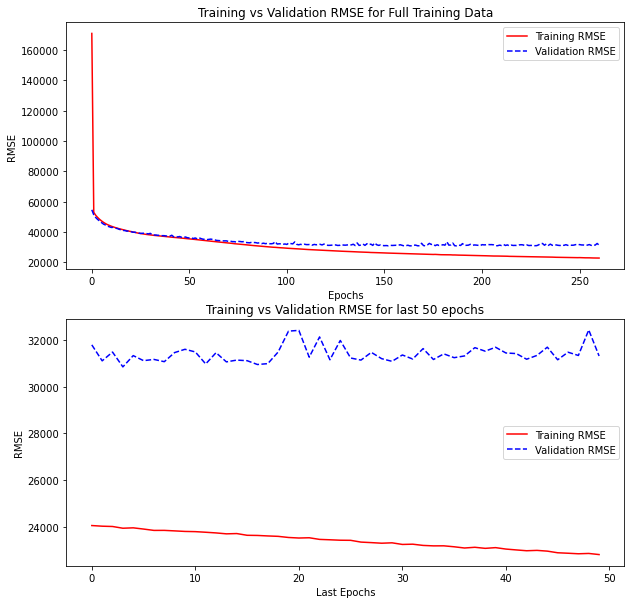

In [81]:
plot_dnn_results(dnn_model_history)

In [72]:
X_test_preprocess = preprocess.transform(X_test)

In [73]:
dnn_model_score = dnn_model.evaluate(X_test_preprocess.toarray(), y_test)

357/357 [==============================] - 2s 5ms/step - loss: 943123456.0000 - root_mean_squared_error: 30710.3145 - mean_absolute_error: 22330.6055 - R2_score: 0.9582


In [75]:
dnn_model_score

[943123456.0, 30710.314453125, 22330.60546875, 0.9581702947616577]

In [77]:
print('RMSE of Deep Learning Model :' ,dnn_model_score[1])
print('MAE of Deep Learning Model :' ,dnn_model_score[2])
print('R2 score of Deep Learning Model :' ,dnn_model_score[3])

RMSE of Deep Learning Model : 30710.314453125
MAE of Deep Learning Model : 22330.60546875
R2 score of Deep Learning Model : 0.9581702947616577


In [84]:
X_test.iloc[0]

District                   4
month              1 03 2018
flat_type             5 ROOM
storey_range        04 TO 06
floor_area_sqm           117
flat_model          Standard
remaining_lease           56
Latitude             1.27675
Longitude            103.819
mrtdist              7763.16
Name: 23132, dtype: object

In [85]:
y_test.iloc[0]

595000.0

In [82]:
dnn_model.predict(X_test_preprocess[0])

array([[582504.7]], dtype=float32)

## LSTM